In [83]:
#导入需要的包
import pandas as pd
import numpy as np
import random as rnd

#可视化的包
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#导入机器学习的包
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
#读取训练集和测试集
train_df = pd.read_csv("/Users/bindo/Desktop/Titanic/train.csv")
test_df = pd.read_csv("/Users/bindo/Desktop/Titanic/test.csv")
combine = [train_df,test_df]

一、数据观察

In [85]:
#可以看看训练集的数据字段(列名称)
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [86]:
# PassengerId :乘客ID
# Survived : 是否存活(1是存活,0是未存活)
# Pclass : 乘客等级(1,2,3)
# Name:乘客姓名
# Sex:乘客性别
# Age:乘客年龄
# SibSp:堂兄弟/妹妹个数
# Parch:父母与小孩个数
# Ticket:船票信息
# Fare:票价
# Cabin:客舱
# Embarked:登船港口

In [87]:
#数据探索首要搞清楚数据类型,是类别还是数值型
train_df.info()
print('_'*40)
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
#我们可以看到
#类别型字段：Survived,Sex,Embarked,Pclass
#数值型字段:Age，Fare,SibSP,Parch

#有些数据集可能有缺失值，或者异常值（直观的那种）
#我们看一下最后五行数据
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [89]:
#统一看一下训练集和测试机数据的信息
train_df.info()
print('_'*60)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

In [90]:
#可以看到数据有字符型（object）、整型（int）、浮点型（float）
#接下来看一下数值型数据的描述信息
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
#从上面的训练集可以看出
#1.训练集数据有892名乘客
#2.是否存货使用0和1来区别（0：死亡，1：存活）
#3.训练集中，38.38%的乘客存活下来了
#4.超过75%的乘客没有和父母小孩一起乘船，可以看到Parch 75%分位数为0，也就是75%的乘客，父母小孩个数为0
#5.票价最高达到了$512
#6.65-80岁的老人不多，因为75%的年龄段都还是38岁

In [92]:
#看完了数值型的描述，我们看看类别型数据的描述
#后面那个O是Object
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sivic, Mr. Husein",male,1601,G6,S
freq,1,577,7,4,644


In [93]:
#从上面得出的信息
#1.训练集891名乘客的名字都是特不相同的
#2.891人中有577名男性，也是人数最多的性别
#3.客舱类别很多，不同的就有147个，有些乘客共享一个客舱
#4.登船港口有三个，其中S港口登陆的乘客最多
#5.票面特征有很高的比率（22%）的重复值（唯一的只有681个）

In [94]:
基于数据分析的假设
我们根据迄今所做的数据探索得出以下假设
在采取行动之前，我们可以能会进一步验证这些假设

关联性假设
1.我们想知道每个特征与生存的关系
2.我们希望在项目的早期就这样做，并将这些相关性与项目后面的建模相关性进行匹配

数据完整性假设
1，我们可能想要完整的年龄特征，因为它肯定与生存相关
2.我们可能想要完整的登船港口数据，因为它也可能与生存或另一些重要的特性相关

数据修正假设
1.在我们的分析中，票面特征可能会被丢弃，因为它包含了高比率的重复（22%），并且可能不会存在票和生存之间的关系
2.在训练和测试集中，客舱特征可能会被删除，因为它高度不完整或包含许多空值
3.乘客Id可以从训练数据集上删除，因为它对生存分析灭有帮助
4.乘客名字特征是相对不标准的，可能不会直接影响生存，所以可能会丢弃

创建新特征假设
1.我们可能想要创建一个新的功能，叫做基于Parch和SibSp的家庭信息，以获得船上家庭成员的总数
2.我们可能希望将名称特征进行提取作为一个新特征
3.我们可能想要为年龄层创造新的特征。将一个连续的数字特征变成一个有序的范围特征
4.如果它有助于我们分析，我们可能还想创建一个票价范围的特征

分类假设
我们还可以根据前面探索的数据描述增加我们的假设
1.女性更可能存货
2.儿童（年龄小于多少）更可能存活下来
3.上层阶级的乘客（Pclass=1）更可能存活下来

有了这些假设，我们继续探索数据

SyntaxError: invalid character in identifier (<ipython-input-94-cc30cf95385e>, line 3)

In [96]:
#1.看看不同乘客等级的平均存活率
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [97]:
#2.看看不同性别乘客的平均存活率
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [98]:
#3.看看共同乘船时不同个数堂兄弟/姐妹的乘客存活率
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [99]:
#4.看看不同父母/孩子一起乘船的乘客生存率
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [100]:
从上面可以看出
1.Pclass 在Pclass=1中观察到显著相关（>0.5）超过50%的人存活（分类假设3）.我们决定在我们的模型中包含这个特征
2.性别对生存影响很大，女性74%都生存下来了（分类假设1）
3.SibSp和Parch这些特征对某些值没有相关性，最好从这些特征派生出一个或者一组新特征（创建新特征假设1）

SyntaxError: invalid syntax (<ipython-input-100-a317975879a8>, line 2)

二、通过可视化进行数据分析

In [ ]:
现在我们可以通过可视化分析数据来继续确认我们的一些假设

相关数值特征
让我们从理解数字特征与我们的解决方案目标（幸存）之间的相关性开始

直方图对于分析像年龄这样的连续的数值变量是很有用的，因为在这些变量中，条带或范围将有助于识别有用的模式

直方图可以自动定义的箱子或者相等的范围表示样本的分布。这有助于我们回答有关特定波段的问题（例如婴儿的存活率更高吗？）

注意，在直方图中，x轴代表了样本或乘客的数量

我想说，不用羡慕R的可视化，我们Python 有seaborn可视化模块！


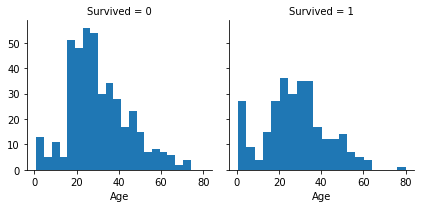

In [101]:
#生存和死亡的乘客分别对应的炼精分布
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [ ]:
从上图可以看出
1.婴儿（年龄<4）生存率高
2.最年长的乘客（年龄=80）幸存
3.大量15-25岁乘客没有存活
4.大多数乘客的年龄在15-35岁之间

决策：
这个简单的分析确认了一些我们的假设，为后面的工作铺垫做好了
在我们的模型训练中，我们应该考虑年龄（分类假设2）
我们应该填充年龄特征的空白值（数据完整性假设1）
我们应该将年龄分段（创建新特征假设3）

相关的数字和序数特征
我们可以将多个特征组合起来，用一个单独的图来确定相关性。这可以通过数值和分类特征来完成


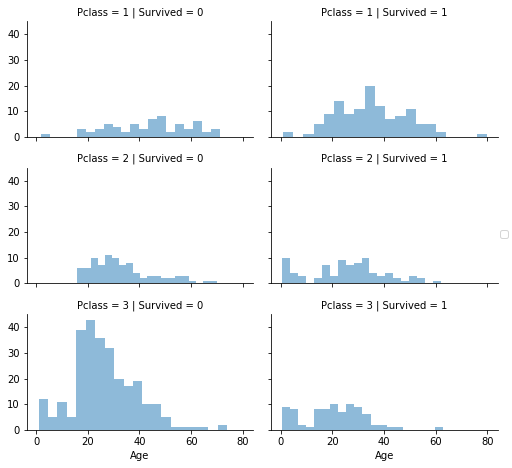

In [102]:
#下面这个图展示了不同舱位的不同年龄段乘客的生存和死亡人数情况
#grid = sns.FacetGrid(train_df, col='Pclass',hue='Survived')
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()


In [ ]:
观察上图：
1.大多数乘客都是Pclass=3，但大多数乘客都没有生还。确认我们的分类假设2
2.Pclass=2和Pclass=3婴儿乘客大多幸存，进一步证实了我们的分裂假设2
3.Pclass=1中大多数乘客都幸存下来，确认我们的分类假设3
4.Pclass在乘客的年龄分布上有所不同

考虑Pclass加入模型训练

关联分类特征
现在我们可以将分类特征与我们的解决方案目标联系起来

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


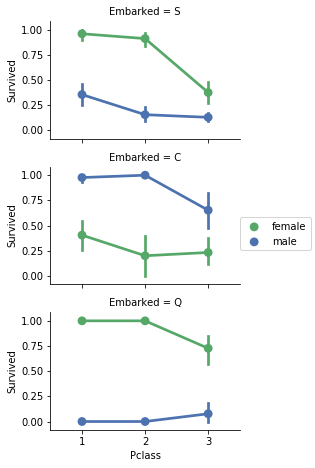

In [103]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

In [ ]:
观察上图
1.女性乘客的生存率比男性高得多。确认分裂假设1
2.在登船口是C时，男性的生存率更高，这可能是Pclass与登船港口之间的一种相关性，并导致了Pclass和幸存关系，而不是在登船港口和幸存之间直接相关
3.与Pclass=2相比，Pclass=3的Q港口登船男性的生存率更高（数据完整性假设2）
4.登船的港口为Pclass=3对男性乘客的生存率有较大的影响，生存率波动较大（数据修正假设1）

决策：
将Sex添加到模型训练中
将登船港口添加到模型训练中

类别特征和数字特征的相关性分析
我们还可以希望类别特征和数字特征关联起来
我们可以考虑登船港口（类别特征），性别（类别特征），与是否幸存（数值类别特征）

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


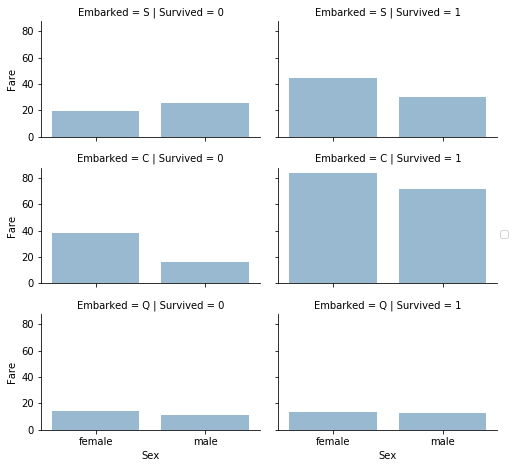

In [104]:
grid = sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()


In [ ]:
上图观察：
1.支付更高票价的乘客更好的生存。确认我们创建新特征假设4，要新的票价范围特征的假设
2.登船港口与存活率有关。确认我们的关联性假设1和数据完整假设2

决策
考虑将船票费用分段创建新特征

三.有争议的数据

In [ ]:
我们对数据做出了一些假设和结论，到目前为止，我们不必为了达到目的改变单个特征。我们现在来执行我们的决定和假设来
纠正、创建和完成目标

通过删除特征来修正模型
这是一个很好的开端。通过删除特征，我们就处理更少的数据。加快了速度，简化了分析

基于我们的假设和之前得出的结果，我们希望删除客舱（数据修正2）和船票信息（数据修正假设1）特征

请注意，我们一起对训练和测试数据集都执行操作，以保持一致

In [123]:
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
# train_df.info()
# print("_"*40)
# test_df.info()
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
#combine = [train_df, test_df]
# "After", train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4

In [126]:
combine = [train_df, test_df]
print("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [127]:
从现有的创建新的特征提取
在删除姓名和乘客ID特征前，我们想要分析是否可以设计一个姓名特征，通过提取称谓并测试称谓和生存之间的相关性

在下面的代码中，我们使用正则表达式提取称谓特征。
正则表达式模式(\w+\.)
expand = False标志返回一个DataFrame

SyntaxError: invalid character in identifier (<ipython-input-127-ec85608a74f0>, line 2)

In [135]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [136]:
#我们可以用更常见的名称替换许多称谓，或将它们归类为少数类
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')     
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.793651
4,Ms,1.000000
5,Rare,0.347826


In [137]:
#我们可以将类别的成为转换为序号表示;
title_mapping = {"Mr":1 ,"Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [141]:
#现在我们可以安全的将Name特征从训练集和测试集中删除,我们也不需要训练数据集中乘客ID
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [ ]:
现在，我们可以将包含字符串的特征转换为数值类型特征，这是大多数模型算法所要求的。这样做也将帮助我们实现功能完成目标。

我们开始将性别（Sex）特征转换为名为性别（Gender）的新特征，其中女性取值为1，男性取值为0

In [144]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female':1, 'male':0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


In [ ]:
完成一个数值型连续特征
现在我们应该开始估计并填充有缺少值或者空值的特征。我们先来对Age特征进行处理

我们可以考虑三种方法来填充连续数值特征
1.一个简单的方法是在均值和标准差之间生成随机数
2.猜测缺失值的更准确的方法是使用其他相关特征，在我们的案例中我们注意到年龄，性别和Pclass之间的相关性。
使用Pclass和Gender特征组合中Age的中位数值猜测年龄值。因此
Pclass=1和Gender=0组合的中位数的年龄，Pclass=1和Gender=1，等等。。。。
3.结合方法1和方法2，因此不要根据中位数猜测年龄值，而根据Pcalss和Gender组合，使用平均值和标准差之间的随机数

方法1和方法3将在我们的模型引入随机噪声。多次执行的结果可能会有所不同。我们更喜欢方法2

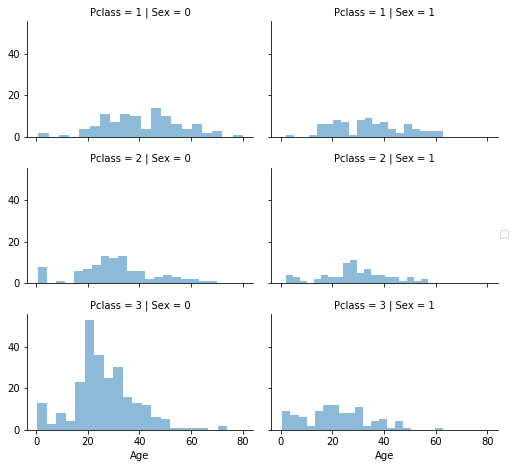

In [146]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [147]:
#让我们开始准备一个空数组，用来放基于Pclass和Gender组合的猜测年龄值
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [151]:
#现在我们遍历Sex（0或1）和Pclass（1，2，3）来计算6种组合的Age的猜测值
#用同类的Sex和Pclass补齐这类的缺失值
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) &(dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 +0.5 )*0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[  (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


In [153]:
#让我们创建年龄段并确定与Survive的的相关性
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) #切成五段
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)                 


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [156]:
#让我们用基于这些段来用数字替换掉Age
for dataset in combine:
    dataset.loc[dataset['Age']<=16, 'Age' ]=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age'] = 3
    dataset.loc[dataset['Age']>64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,0,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,0,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,0,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,0,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,0,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [159]:
#我们现在可以将年龄段的特征删除了
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0,1,0,7.2500,S,1.0
1,1,1,1,0,1,0,71.2833,C,3.0
2,1,3,1,0,0,0,7.9250,S,2.0
3,1,1,1,0,1,0,53.1000,S,3.0
4,0,3,0,0,0,0,8.0500,S,1.0


In [161]:
#结合现有特征创建新特征
#我们可以为Parch和SibSp结合的家庭规模创建一个新功能。这将使得我们能否从我们的数据中删除Parch和SibSp特征
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)              

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [162]:
#我们可以创建另一个称为IsAlone（单人）的特征
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] ==1 ,'IsAlone'] = 1
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [163]:
#我们放弃Parch，SibSp，FamilySize特征，使用IsAlone特征：
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis=1)
test_Df = test_df.drop(['Parch','SibSp','FamilySize'], axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0,7.2500,S,1.0,0
1,1,1,1,0,71.2833,C,3.0,0
2,1,3,1,0,7.9250,S,2.0,1
3,1,1,1,0,53.1000,S,3.0,0
4,0,3,0,0,8.0500,S,1.0,1


In [165]:
#我们还可以创建一个结合Pclass和Age的人工特征
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,0,0,3
1,0,0,1
2,0,0,3
3,0,0,1
4,0,0,3
5,0,0,3
6,0,0,1
7,0,0,3
8,0,0,3
9,0,0,2


In [ ]:
完成分类特征

登船港口特征需要基于登乘港口的S、Q、C值。我们的训练数据集有两个缺失值。我们使用众数填补这些缺失值

In [167]:
freq_port = train_df.Embarked.dropna().mode()[0] #找出出现次数最多的港口名称
freq_port

'S'

In [168]:
#用上面的结果去填充港口的缺失值
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [169]:
#将类别特征转换为数值特征
#我们现在可以通过创建一个新的数值型特征Port来转换EmbarkedFill特征
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,0,7.2500,0,1.0,0,0
1,1,1,1,0,71.2833,1,3.0,0,0
2,1,3,1,0,7.9250,0,2.0,1,0
3,1,1,1,0,53.1000,0,3.0,0,0
4,0,3,0,0,8.0500,0,1.0,1,0


In [ ]:
快速完成并转换数字特征
我们现在补齐Fare船票特征，使用出现最多的情况填充
我们还想将票价四舍五入到小数点后两位，因为它代表货币

In [170]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,0,0,0,7.8292,2,1.0,1,1,0
1,893,3,1,0,1,0,7.0000,0,3.0,2,0,0
2,894,2,0,0,0,0,9.6875,2,1.0,1,1,0
3,895,3,0,0,0,0,8.6625,0,1.0,1,1,0
4,896,3,1,0,1,1,12.2875,0,3.0,3,0,0


In [171]:
#我们能创建船票分段的特征
train_df['FareBand'] = pd.qcut(train_df['Fare'],4) #分段
train_df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand',ascending=True)              

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [172]:
#根据船票分段Fareband将票价特征转换为序数值
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,0,0,0,1.0,0,0
1,1,1,1,0,3,1,3.0,0,0
2,1,3,1,0,1,0,2.0,1,0
3,1,1,1,0,3,0,3.0,0,0
4,0,3,0,0,1,0,1.0,1,0
5,0,3,0,0,1,2,1.0,1,0
6,0,1,0,0,3,0,1.0,1,0
7,0,3,0,0,2,0,4.0,0,0
8,1,3,1,0,1,0,3.0,0,0
9,1,2,1,0,2,1,3.0,0,0


In [173]:
#还有测试集看看
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,0,0,0,0,2,1.0,1,1,0
1,893,3,1,0,1,0,0,0,3.0,2,0,0
2,894,2,0,0,0,0,1,2,1.0,1,1,0
3,895,3,0,0,0,0,1,0,1.0,1,1,0
4,896,3,1,0,1,1,1,0,3.0,3,0,0


四.模型，预测和解决问题

In [ ]:
现在我们准备好训练一个模型并且用它做预测来解决问题。
有60多种预测模型可以选择，我们必须了解问题类型和求解要求以便缩小选择空间，选择少数几个模型做预测

我们的问题是分类和回归问题。我们想要确定输出情况（生存与否）和一些变量特征（性别，年龄，登船港口等）

我们正在做的机器学习是有监督的，因为我们正在使用给定的数据集来训练我们的模型

有了这两个标准 -- 有监督学习 + 分类&回归 ，我们可以将我们的模型选择缩小到几个。这些包括：
1.Logistic回归
2.KNN
3.支持向量机（SVM）
4.朴素贝叶斯
5.决策树
6.随机森林
7.感知器
8.人工神经网络
9.RVM

In [182]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(["PassengerId",'FamilySize','SibSp','Parch'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic回归

In [ ]:
Logistic回归是在工作流程早起运行的有用模型，逻辑回归通过使用逻辑函数估计概率来度量分类因变量（特征）与一个或
多个自变量（特征）之间的关系，该逻辑函数是积累逻辑分布

In [183]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100,2)
acc_log

78.0

In [185]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.162515
5,Title,0.403895
4,Embarked,0.312196
6,IsAlone,0.047478
2,Age,0.043900
3,Fare,-0.034733
7,Age*Class,-0.063717
0,Pclass,-0.973991


In [ ]:
我们可以使用Logistics回归来验证我们对特征创建和完成目标的假设和决策，这可以通过计算
决策函数中的相关系数来完成

正相关系数增加了相应的对数几率，从而增加了概率。
负相关系数会降低相应的对数几率，从而降低了概率

性别有着最高的正相关系数，意味着性别特征值增加，生存几率增加最多
反之，舱位增加，生存几率下降越快

Age*Class 是一个很好的人造特征，因为它 与生存几率具有第二高的负相关性
称谓Title是第二高的正相关性

支持向量机
接下来我们使用支持向量机进行建模。所述支持向量机是具有关联学习算法的监督学习模型，
用于分类和回归分析的数据

给定一组样本，每个样本标记为属于两个类别中的一个或者另一个，SVM训练算法建立
一个模型，将新的测试样本分配给一个类别或者另一个类别，使其成为非概率二元线性分类器


In [186]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.72

In [ ]:
KNN 算法
在模式识别领域中，K-最近邻居算法（简称K-NN）是一种用于分类和回归的无参数方法
样本通过邻居的多数投票进行分类，样本被分配到K个最近邻居中最常见的类别
（K是一个正整数，通常很小）

如果k=1 ，则将该对象简单地分配给该单个最近邻居的类别

In [187]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.16

In [ ]:
朴素贝叶斯
在机器学习中，朴素贝叶斯分类器是一组简单的概率分类器

它基于运用贝叶斯定理和特征之间强大的独立性假设
朴素贝叶斯分类器具有高度可扩展性，在学习训练中需要许多变量的参数

In [188]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

71.49

In [ ]:
感知器
感知器适用于二元分类器的监督学习的算法
（函数可以由各种输入决定，输入可以是数字向量，属于某个特定类别的类型）

它是一种线性分类器，即一种分类算法，它基于将一组权重与特征向量相结合的线性预测函数进行预测

该算法允许在线学习，因为它一次处理训练集中的元素

In [189]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.23

In [ ]:
线性SVC

In [190]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.23

In [ ]:
随机梯度下降

In [191]:
#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.68

In [ ]:
决策树
该模型使用决策树作为预测模型，将特征映射为关于目标值的结论

目标变量可以采用有限的一组的数模型称为分类树；
在这些树结构中，叶代表类标签，分支代表通往这些类标签的特征的连接
目标变量可以采用连续值（通常是实数）的决策树被称为回归树

In [192]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.51

In [ ]:
随机森林
随机森林或者随机决策森林一种用于分类，回归和其他任务的集合学习方法
通过在训练时构造多个决策树并输出取为各个树的类（分类模式）或平均预测类（回归）的类

In [193]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


84.51

In [ ]:
模型评估
我们现在可以对所有使用的模型进行评估，以便为我们的问题选择最好的模型

In [194]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.51
8,Decision Tree,84.51
1,KNN,83.16
0,Support Vector Machines,82.72
6,Stochastic Gradient Decent,78.68
5,Perceptron,78.23
7,Linear SVC,78.23
2,Logistic Regression,78.00
4,Naive Bayes,71.49


In [ ]:
虽然决策树和随机森林评分相同，但我们选择使用随机森林来纠正决策树过拟合训练集的可能

In [195]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [197]:
submission.to_csv('Third_try.csv', index=False)